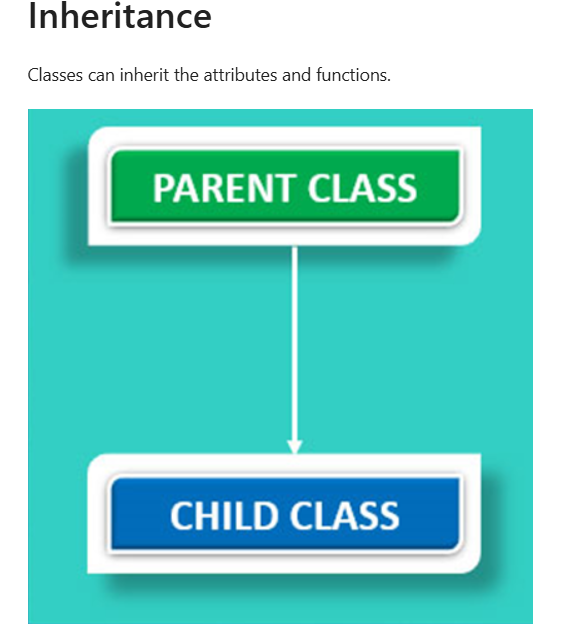

Child class will inherit the attributes and functions of parent class

In [1]:
class Person:

    def __init__(self, name, age):
        self.name = name
        self.age = age

    def intro(self):
        print(f"My name is {self.name}")
        print(f"I am {self.age} years old")

In [3]:
class Employee(Person):

    def __init__(self, name, age, company):
        super().__init__(name, age)
        self.company = company

    def work(self):
        print(f"I work for {self.company}")

In [4]:
p1 = Person(name = "Sarthak", age = 28)

In [5]:
p1

In [6]:
type(p1)

__main__.Person

In [7]:
p1.name

'Sarthak'

In [8]:
p1.age

28

In [9]:
p1.intro()

My name is Sarthak
I am 28 years old


In [10]:
e1 = Employee(name = "Aditi", age = 25, company = "TCS")
e1

In [11]:
type(e1)

__main__.Employee

In [12]:
e1.name

'Aditi'

In [13]:
e1.age

25

In [14]:
e1.company

'TCS'

In [15]:
# Intro function is inherited from Parent class
e1.intro()

My name is Aditi
I am 25 years old


In [16]:
e1.work()

I work for TCS


In [17]:
e1.intro()
e1.work()

My name is Aditi
I am 25 years old
I work for TCS


In [18]:
e2 = Employee(28, "Raman", 3)
e2.name

28

In [19]:
e2.age

'Raman'

In [20]:
e2.name

28

In [23]:
type(e2)

__main__.Employee

In [24]:
e2.company

3

In [25]:
e2.intro()

My name is 28
I am Raman years old


In [26]:
e2.work()

I work for 3


# Pydantic Library for data validation in classes

In [105]:
%pip install pydantic email-validator


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Conditions in pydantic
1. ge - greater than or equal to
2. gt - greater than
3. le - less than or equal to
4. lt - less than

In [106]:
from pydantic import BaseModel, Field, EmailStr
from typing import Literal

In [107]:
class Student(BaseModel):
    roll_no: int = Field(description="Roll no of student", ge=101)
    name: str = Field(description="Name of student", min_length=3, max_length=50)
    age: int = Field(description="Age of student", ge=18, le=100)
    email: EmailStr = Field(description="Email of student")
    gender: Literal["male", "female"] = Field(description="Gender of student")
    hobbies: list[str] = Field(description="Hobbies of student", default_factory=list)

    def get_info(self):
        print(f"Roll Number : {self.roll_no}")
        print(f"Name : {self.name}")
        print(f"Age : {self.age} years")
        print(f"Email : {self.email}")
        print(f"Gender : {self.gender}")
        print(f"Hobbies : {self.hobbies}")

In [108]:
s1 = Student(
    roll_no= 123,
    name = "Rahul",
    age = 25,
    email= "rahul@gmail.com",
    gender= "male",
    hobbies= ["Cricket", "Singing"]
)

In [109]:
s1

Student(roll_no=123, name='Rahul', age=25, email='rahul@gmail.com', gender='male', hobbies=['Cricket', 'Singing'])

In [110]:
type(s1)

__main__.Student

In [111]:
s1.roll_no

123

In [112]:
s1.name

'Rahul'

In [113]:
s1.age

25

In [114]:
s1.gender

'male'

In [115]:
s1.email

'rahul@gmail.com'

In [116]:
s1.hobbies

['Cricket', 'Singing']

In [117]:
s1.get_info

<bound method Student.get_info of Student(roll_no=123, name='Rahul', age=25, email='rahul@gmail.com', gender='male', hobbies=['Cricket', 'Singing'])>

In [118]:
s1.get_info()

Roll Number : 123
Name : Rahul
Age : 25 years
Email : rahul@gmail.com
Gender : male
Hobbies : ['Cricket', 'Singing']


In [119]:
s2 = Student(
    roll_no= 145,
    name= "Priya",
    age = 35,
    email = "NotAvail",
    gender= "female",
    hobbies= ["Dancing"]
)

ValidationError: 1 validation error for Student
email
  value is not a valid email address: An email address must have an @-sign. [type=value_error, input_value='NotAvail', input_type=str]

In [ ]:
s2

NameError: name 's2' is not defined

In [ ]:
s3= Student(
    roll_no= 50,
    name= 3.4,
    age = 200,
    email = "random",
    gender= "M",
    hobbies= {"a": 1, "b":2}
)

ValidationError: 6 validation errors for Student
roll_no
  Input should be greater than or equal to 101 [type=greater_than_equal, input_value=50, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/greater_than_equal
name
  Input should be a valid string [type=string_type, input_value=3.4, input_type=float]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
age
  Input should be less than or equal to 100 [type=less_than_equal, input_value=200, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/less_than_equal
email
  value is not a valid email address: An email address must have an @-sign. [type=value_error, input_value='random', input_type=str]
gender
  Input should be 'male' or 'female' [type=literal_error, input_value='M', input_type=str]
    For further information visit https://errors.pydantic.dev/2.10/v/literal_error
hobbies
  Input should be a valid list [type=list_type, input_value={'a': 1, 'b': 2}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/list_type

In [ ]:
s3

NameError: name 's3' is not defined

In [ ]:
s1

Student(roll_no=123, name='Rahul', age=25, email='rahul@gmail.com', gender='male', hobbies=['Cricket', 'Singing'])

In [ ]:
d = s1.model_dump()
d

{'roll_no': 123,
 'name': 'Rahul',
 'age': 25,
 'email': 'rahul@gmail.com',
 'gender': 'male',
 'hobbies': ['Cricket', 'Singing']}

In [ ]:
d["name"]

'Rahul'

In [ ]:
d["age"]

25

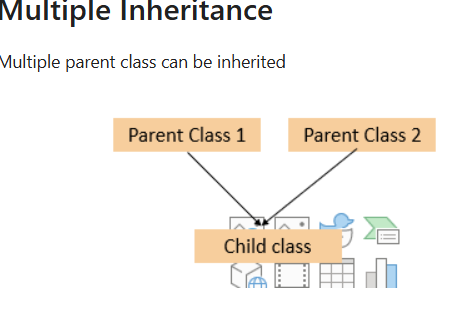

In [ ]:
class BaseSalary:

    def __init__(self, base_sal):
        self.base_sal = base_sal

    def get_base_salary(self):
        return self.base_sal   

In [ ]:
class Bonus:

    def __init__(self, per_bonus):
        self.per_bonus = per_bonus

    def calculate_bonus(self, base_sal):
        bonus = (self.per_bonus / 100) * base_sal
        return bonus

In [ ]:
class TotalSalary(BaseSalary, Bonus):

    def __init__(self, base_sal, per_bonus):
        BaseSalary.__init__(self, base_sal)
        Bonus.__init__(self, per_bonus)

    def get_total_salary(self):
        bonus = self.calculate_bonus(self.base_sal)
        total_sal = self.base_sal + bonus
        return total_sal

In [ ]:
sal1 = TotalSalary(base_sal= 50_000, per_bonus = 20)

In [ ]:
type(sal1)

__main__.TotalSalary

In [ ]:
sal1.get_base_salary()

50000

In [ ]:
sal1.calculate_bonus(sal1.base_sal)

10000.0

In [ ]:
sal1.get_total_salary()

60000.0

In [ ]:
sal2 = TotalSalary(base_sal= 38_000, per_bonus= 12.5)
type(sal2)

__main__.TotalSalary

In [ ]:
sal2.get_base_salary()

38000

In [ ]:
sal2.calculate_bonus(sal2.base_sal)

4750.0

In [ ]:
sal2.get_total_salary()

42750.0

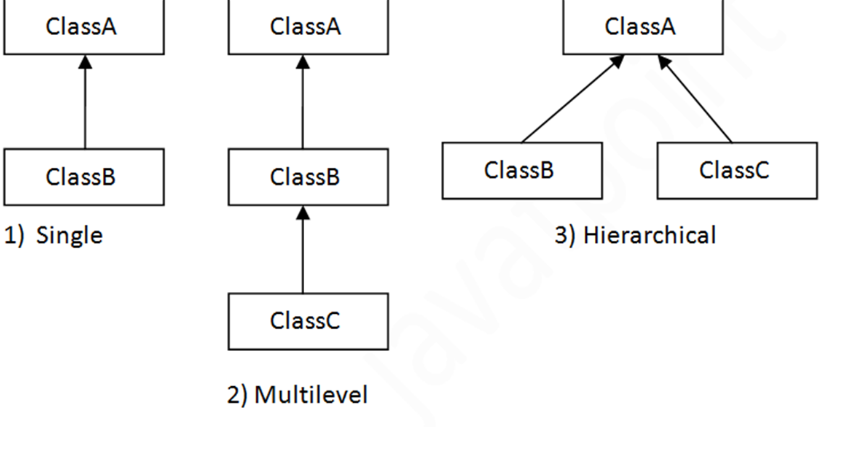

# Multilevel Inheritance

In [62]:
class Employee2:

    def __init__(self, emp_id, name):
        self.emp_id = emp_id
        self.name = name

    def get_employee_info(self):
        print(f"Employee Id : {self.emp_id}, Employee Name : {self.name}")

In [63]:
class Manager(Employee2):

    def __init__(self, emp_id, name, dept):
        super().__init__(emp_id, name)
        self.dept = dept

    def get_manager_info(self):
        print(f"Department : {self.dept}")

In [64]:
class ProjectManager(Manager):

    def __init__(self, emp_id, name, dept, project):
        super().__init__(emp_id, name, dept)
        self.project = project

    def get_project_info(self):
        print(f"Project : {self.project}")

In [65]:
e1 = Employee2(emp_id = 108, name = "Sarthak")
type(e1)

__main__.Employee2

In [66]:
e1.emp_id

108

In [67]:
e1.name

'Sarthak'

In [69]:
e1.get_employee_info()

Employee Id : 108, Employee Name : Sarthak


In [70]:
m1 = Manager(emp_id = 104, name = "Rahul", dept = "Mechanical Engg.")
type(m1)

__main__.Manager

In [71]:
m1.emp_id

104

In [72]:
m1.name

'Rahul'

In [73]:
m1.dept

'Mechanical Engg.'

In [74]:
m1.get_manager_info()

Department : Mechanical Engg.


In [75]:
m1.get_employee_info()

Employee Id : 104, Employee Name : Rahul


In [76]:
m1.get_employee_info()
m1.get_manager_info()

Employee Id : 104, Employee Name : Rahul
Department : Mechanical Engg.


In [77]:
pm1 = ProjectManager(emp_id = 102, name = "Raman", dept = "Mech Engg.", project = "Tesla Drivetrain")

In [78]:
type(pm1)

__main__.ProjectManager

In [79]:
pm1.emp_id

102

In [80]:
pm1.name

'Raman'

In [81]:
pm1.dept

'Mech Engg.'

In [82]:
pm1.project

'Tesla Drivetrain'

In [83]:
pm1.get_employee_info()
pm1.get_manager_info()
pm1.get_project_info()

Employee Id : 102, Employee Name : Raman
Department : Mech Engg.
Project : Tesla Drivetrain


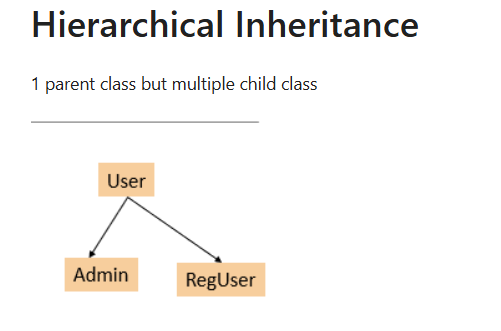

In [84]:
class User:

    def __init__(self, username, email):
        self.username = username
        self.email = email
    
    def get_user_info(self):
        print(f"Username : {self.username}, Email : {self.email}")

In [85]:
class Admin(User):

    def __init__(self, username, email, access):
        super().__init__(username, email)
        self.access = access

    def get_access_info(self):
        print(f"Access : {self.access}")

In [86]:
class RegUser(User):

    def __init__(self, username, email, sub):
        super().__init__(username, email)
        self.sub = sub

    def get_subscription_info(self):
        print(f"Subsctription Interval : {self.sub}")
u1 = User(username= "rahul1", email= "rahul@gmail.com")
type(u1)

__main__.User

In [87]:
u1.username

'rahul1'

In [88]:
u1.email

'rahul@gmail.com'

In [89]:
u1.get_user_info()

Username : rahul1, Email : rahul@gmail.com


In [90]:
a1 = Admin(username= "admin101", email="admin101@etlhive.com", access="edit website")
type(a1)

__main__.Admin

In [91]:
a1.username

'admin101'

In [96]:
a1.get_access_info()

Access : edit website


In [93]:
a1.email

'admin101@etlhive.com'

In [94]:
a1.access

'edit website'

In [95]:
a1.get_user_info()

Username : admin101, Email : admin101@etlhive.com


In [97]:
a1.get_user_info()
a1.get_access_info()

Username : admin101, Email : admin101@etlhive.com
Access : edit website


In [98]:
a1.get_subscription_info()

AttributeError: 'Admin' object has no attribute 'get_subscription_info'

In [99]:
r1 = RegUser(username = "aditim2", email = "aditim@gmail.com", sub = "Monthly")
type(r1)

__main__.RegUser

In [100]:
r1.username

'aditim2'

In [101]:
r1.email

'aditim@gmail.com'

In [102]:
r1.sub

'Monthly'

In [103]:
r1.get_user_info()
r1.get_subscription_info()

Username : aditim2, Email : aditim@gmail.com
Subsctription Interval : Monthly


In [104]:
r1.get_access_info()

AttributeError: 'RegUser' object has no attribute 'get_access_info'